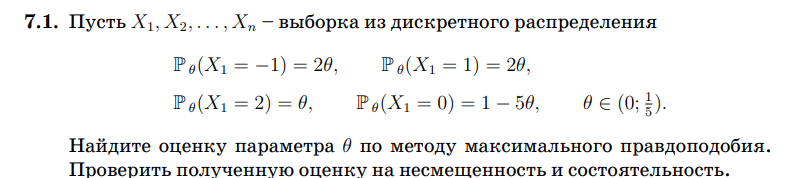

In [2]:
from scipy.optimize import minimize_scalar
import numpy as np

class 

# Предположим, что у нас есть следующая выборка данных:
sample_data = [-1, 0, 1, 2, 0, -1, 1, 0, 2, 0, -1]  # Замените этими значениями реальные данные выборки

# Подсчитываем количество вхождений каждого значения в выборке
k_minus1 = sample_data.count(-1)
k_0 = sample_data.count(0)
k_1 = sample_data.count(1)
k_2 = sample_data.count(2)

# Функция логарифма правдоподобия
def log_likelihood(theta, k_minus1, k_0, k_1, k_2):
    # Убедимся, что theta находится в допустимом диапазоне
    if theta <= 0 or theta >= 0.2:
        return -np.inf  # Возвращаем минус бесконечность, если theta вне диапазона
    return (k_minus1 + k_1) * np.log(2 * theta) + k_2 * np.log(theta) + k_0 * np.log(1 - 5 * theta)

# Минимизируем отрицательный логарифм правдоподобия
res = minimize_scalar(lambda theta: -log_likelihood(theta, k_minus1, k_0, k_1, k_2), bounds=(0, 0.2), method='bounded')

# Проверяем, что оптимизация успешно завершилась
if res.success:
    theta_hat = res.x
    print(f"Оценка параметра θ методом максимального правдоподобия: {theta_hat}")
else:
    print("Оптимизация не удалась.")


Оценка параметра θ методом максимального правдоподобия: 0.1272737979846412


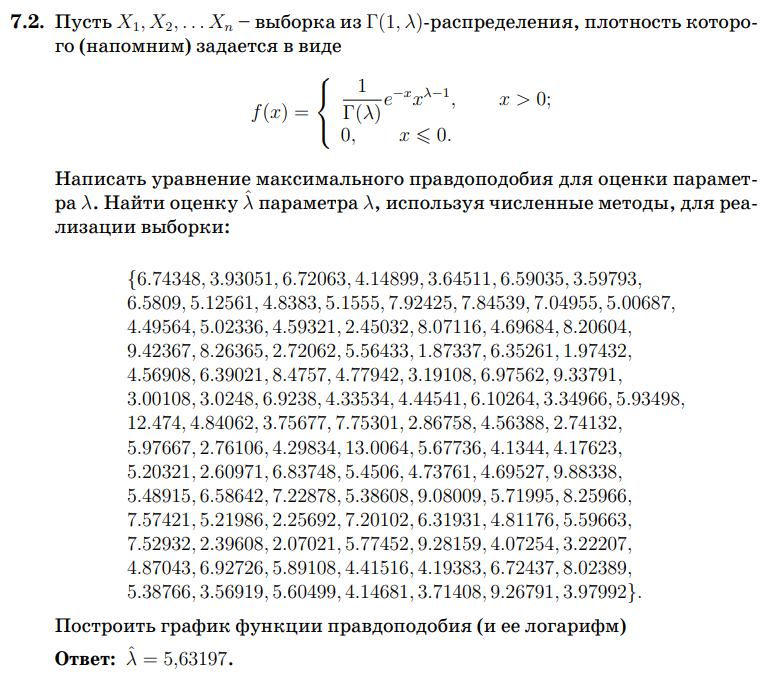

Оценка параметра λ методом максимального правдоподобия: 0.95838


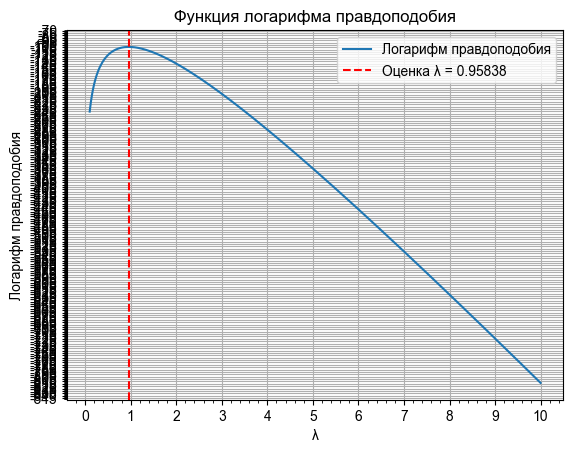

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import matplotlib.ticker as ticker

# Настраиваем отображение русских букв в графиках
plt.rcParams['font.sans-serif'] = ['Arial', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Генерация случайной выборки из экспоненциального распределения
true_lambda = 1
sample_data = expon.rvs(scale=1/true_lambda, size=100)

# Функция для вычисления оценки параметра λ методом максимального правдоподобия
def mle_lambda(data):
    n = len(data)
    sum_data = np.sum(data)
    lambda_hat = n / sum_data
    return lambda_hat

# Вычисляем оценку параметра λ
lambda_hat = mle_lambda(sample_data)
print(f"Оценка параметра λ методом максимального правдоподобия: {lambda_hat:.5f}")

# Функция логарифма правдоподобия
def log_likelihood(lambda_, data):
    return len(data) * np.log(lambda_) - lambda_ * np.sum(data)

# Генерируем последовательность значений λ для построения графика
lambdas = np.linspace(0.1, 10, 400)
likelihoods = [log_likelihood(l, sample_data) for l in lambdas]

# Построение графика логарифма правдоподобия
plt.plot(lambdas, likelihoods, label='Логарифм правдоподобия')
plt.axvline(x=lambda_hat, color='red', linestyle='--', label=f'Оценка λ = {lambda_hat:.5f}')
plt.title('Функция логарифма правдоподобия')
plt.xlabel('λ')
plt.ylabel('Логарифм правдоподобия')
plt.legend()
plt.grid(True)

# Форматирование чисел на осях для красивого отображения
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show()


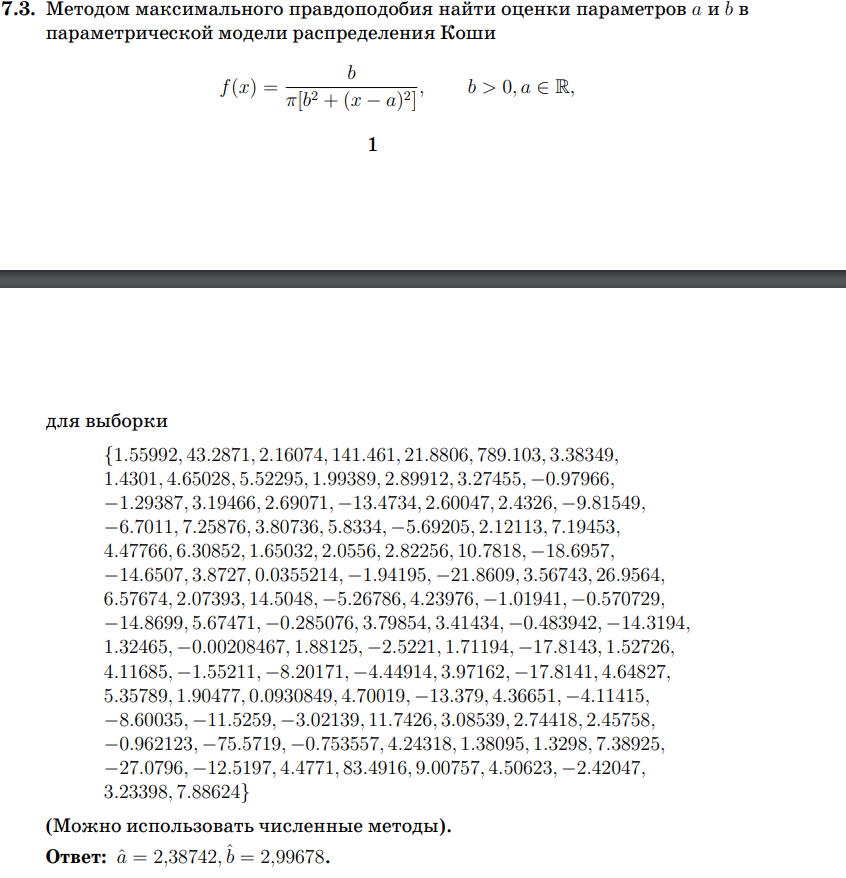

In [1]:
import numpy as np
from scipy.optimize import minimize

# Заданная выборка данных
data = np.array([1.55992, 43.2871, 2.16074, 141.461, 21.8806, 789.103, 3.38349, 1.4301, 4.65028, 5.52295, 1.99389, 2.89912, 3.27455, -0.97966, -1.29387, 3.19466, 2.69071, -13.4734, 2.60047, 2.4326, -9.81549, -6.7011, 7.25876, 3.80736, 5.8334, -5.69205, 2.12113, 7.19453, 4.47766, 6.30852, 1.65032, 2.0556, 2.82256, 10.7818, -18.6957, -14.6507, 3.8727, 0.0355214, -1.94195, -21.8609, 3.56743, 26.9564, 6.57674, 2.07393, 14.5048, -5.26786, 4.23976, -1.01941, -0.570729, -14.8699, 5.67471, -0.285076, 3.79854, 3.41434, -0.483942, -14.3194, 1.32465, -0.00208467, 1.88125, -2.5221, 1.71194, -17.8143, 1.52726, 4.11685, -1.55211, -8.20171, -4.44914, 3.97162, -17.8141, 4.64827, 5.35789, 1.90477, 0.0930849, 4.70019, -13.379, 4.36651, -4.11415, -8.60035, -11.5259, -3.02139, 11.7426, 3.08539, 2.74418, 2.45758, -0.962123, -75.5719, -0.753557, 4.24318, 1.38095, 1.3298, 7.38925, -27.0796, -12.5197, 4.4771, 83.4916, 9.00757, 4.50623, -2.42047, 3.23398, 7.88624])

# Функция правдоподобия для распределения Коши
def likelihood(params, data):
    a, b = params
    log_likelihood = np.sum(np.log(b / (np.pi * (b**2 + (data - a)**2))))
    return -log_likelihood  # Минимизируем отрицательное значение функции правдоподобия

# Начальные значения для параметров a и b
initial_guess = [0, 1]

# Минимизация отрицательного логарифма функции правдоподобия
result = minimize(likelihood, initial_guess, args=(data,), bounds=((-np.inf, np.inf), (0, np.inf)))

# Получение оценок параметров a и b
estimated_a, estimated_b = result.x
print("Оценка параметра a:", estimated_a)
print("Оценка параметра b:", estimated_b)


Оценка параметра a: 2.387415704094704
Оценка параметра b: 2.996779006759254


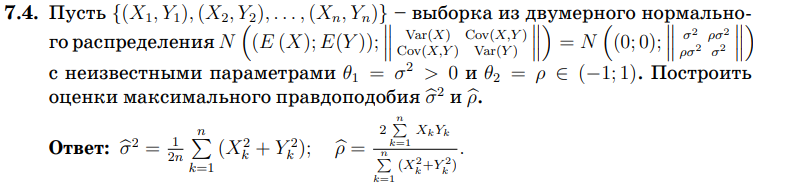

In [3]:
import numpy as np

# Предположим, что у нас есть выборка данных (X, Y)
data = np.array([(X1, Y1), (X2, Y2), ..., (Xn, Yn)])  # Замените данными вашу выборку

# Вычисляем необходимые статистики из выборки
n = len(data)
squared_sum_X = np.sum(data[:, 0] ** 2)
squared_sum_Y = np.sum(data[:, 1] ** 2)
sum_XY = np.sum(data[:, 0] * data[:, 1])

# Оценки максимального правдоподобия для sigma^2 и rho
sigma_hat_sq = 1 / (2 * n) * (squared_sum_X + squared_sum_Y)
rho_hat = 2 / (squared_sum_X + squared_sum_Y) * sum_XY

print(f"Оценка параметра sigma^2: {sigma_hat_sq}")
print(f"Оценка параметра rho: {rho_hat}")


NameError: name 'X1' is not defined